In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

print('✅ All imports successful!')

✅ All imports successful!


**Part 1: Python Fundamentals (5 min)**

Today: Functions - write a function that takes a list and returns min, max, and mean

**Part 2: Pandas Tier 1 Rep (5 min)**

Quick drill on any austin_housing data:

- Load → filter with multiple conditions → groupby → aggregate → sort

**Part 3: Boxplot Practice (5-10 min)**

Create boxplot comparing price across 3-4 neighborhoods:

- Use `plt.boxplot()` or `df.boxplot(by='neighbourhood_cleansed')`
- Labels: x-axis, y-axis, title
- Try from memory first, look up syntax if needed

In [2]:
list1 = [1,3,24,18,2,7,99,412,111,5,4,3,29]
list2 = [1,2,3,4,5,6,7,8,9]

def list_describe(x):
    return print(f"List min: {min(x)}\nList max: {max(x)}\nList mean: {sum(x) / len(x):.2f}")

list_describe(list1)
list_describe(list2)

List min: 1
List max: 412
List mean: 55.23
List min: 1
List max: 9
List mean: 5.00


In [3]:
df = pd.read_csv('../../data/raw/listings.csv')
df.shape

(15187, 79)

In [4]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.65
3,6448,https://www.airbnb.com/rooms/6448,20250613040113,2025-06-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.02
4,8502,https://www.airbnb.com/rooms/8502,20250613040113,2025-06-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.69,4.63,NaN,f,1,1,0,0,0.29


In [5]:
pd.set_option('display.max_rows',None)
df.head(1).T

,0
id,5456
listing_url,https://www.airbnb.com/rooms/5456
scrape_id,20250613040113
last_scraped,2025-06-13
source,city scrape
name,"Walk to 6th, Rainey St and Convention Ctr"
description,Great central location for walking to Convent...
neighborhood_overview,My neighborhood is ideally located if you want...
picture_url,https://a0.muscache.com/pictures/14084884/b5a3...
host_id,8028


In [6]:
df[(df['host_listings_count']>2) & (df['estimated_occupancy_l365d']>200)].shape

(963, 79)

In [7]:
df.groupby('listing_url')['estimated_revenue_l365d'].mean().sort_values(ascending=False).head(5)

listing_url
https://www.airbnb.com/rooms/1147207983939619570    3900000.0
https://www.airbnb.com/rooms/854345788191857434     2400000.0
https://www.airbnb.com/rooms/854346834290244897     1500000.0
https://www.airbnb.com/rooms/1294901907419073449     900000.0
https://www.airbnb.com/rooms/973897159428898174      499500.0
Name: estimated_revenue_l365d, dtype: float64

In [8]:
df['price'] = df['price'].str.replace(r'[$,]', '', regex=True).astype(float)

/var/folders/2f/jx1gxd9d3jzc36f0xbhqc64m0000gn/T/ipykernel_24323/1930068462.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_78701, data_78704, data_78702],


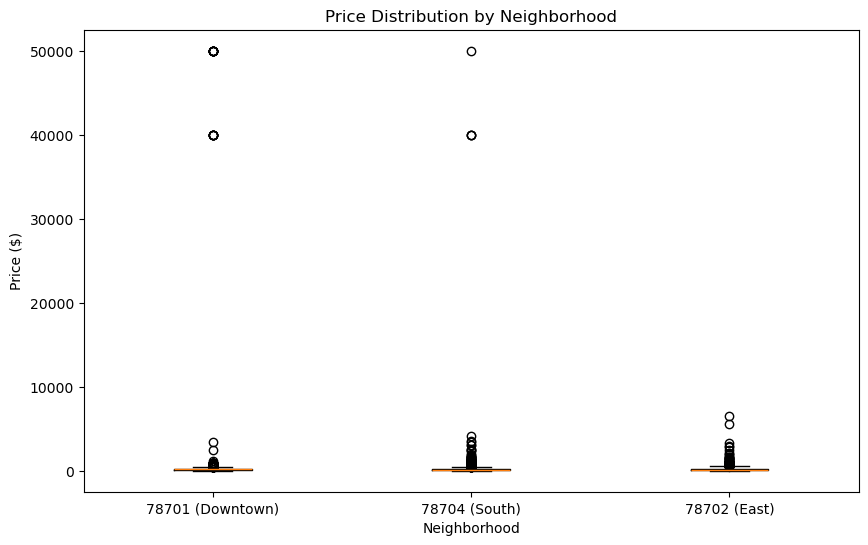

In [12]:
# Drop NaNs from each group before plotting
data_78701 = df[df['neighbourhood_cleansed'] == 78701]['price'].dropna()
data_78704 = df[df['neighbourhood_cleansed'] == 78704]['price'].dropna()
data_78702 = df[df['neighbourhood_cleansed'] == 78702]['price'].dropna()

plt.figure(figsize=(10, 6))
plt.boxplot([data_78701, data_78704, data_78702],
            labels=['78701 (Downtown)', '78704 (South)', '78702 (East)'])
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Neighborhood')
plt.show()